# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/challenge-two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [1]:
import numpy as np
import matplotlib as plt

# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Visualizziamo il Training Set e il Test Set:

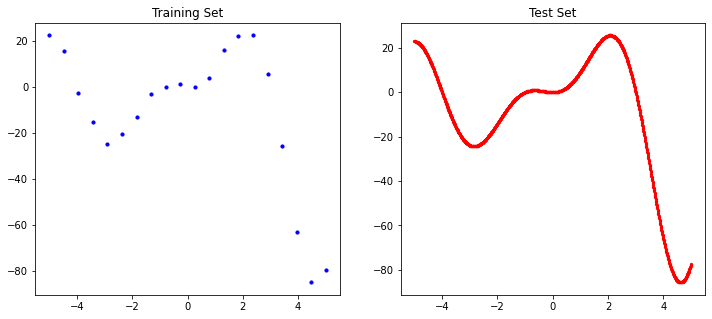

In [2]:
import matplotlib.pyplot as plt

# Plot training set
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.scatter(X_train, y_train, s=10, color='blue')
ax1.set_title('Training Set')

# Plot test set
ax2.scatter(X_test, y_test, s=5, color='red')
ax2.set_title('Test Set')

plt.show()


### Fit a linear Ridge Regression model

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# define the parameter grid
param_grid_Ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# define the Ridge regression model
ridge = Ridge()

# define the GridSearchCV object
grid_search_Ridge = GridSearchCV(ridge, param_grid_Ridge, cv=5, scoring='neg_root_mean_squared_error')

# fit the GridSearchCV object to the training data
grid_search_Ridge.fit(X_train, y_train)

# print the best parameters and the best score
print("Best parameters: ", grid_search_Ridge.best_params_)

# predict on the testing data using the best Ridge model
best_ridge = grid_search_Ridge.best_estimator_
y_pred = best_ridge.predict(X_test)

# calculate and print the RMSE on the testing data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on testing data: ", rmse)


Best parameters:  {'alpha': 10}
RMSE on testing data:  26.816627763520174


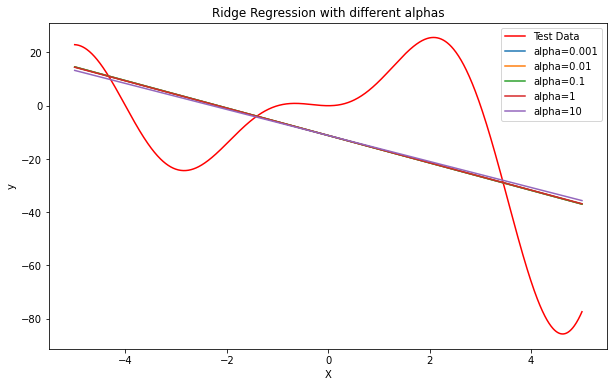

In [4]:
import matplotlib.pyplot as plt

# create a new figure with size 10x6 inches
plt.figure(figsize=(10, 6))
# plot the test data
plt.plot(X_test, y_test, color='red', label='Test Data')

# plot the predictions from each model with different colors
for i, alpha in enumerate(param_grid_Ridge['alpha']):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(X_test, y_pred, label='alpha={}'.format(alpha))

# add legend and axis labels
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with different alphas')
plt.show()


Dall'analisi risulta che il miglior valore di alpha per la regolarizzazione è 10. La ridge regression non sembra essere un buon modello predittivo per questo dataset in quanto la RMSE è alta. Questo è dovuto al fatto che la funzione generatrice dei dati non è lineare. Si prevede di ottenere risultati migliori con la KRR.

### Kernel Ridge Regression

Task:  Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

KRR con Kernel Gaussiano

Best parameters: {'alpha': 0.1, 'gamma': 1.0}


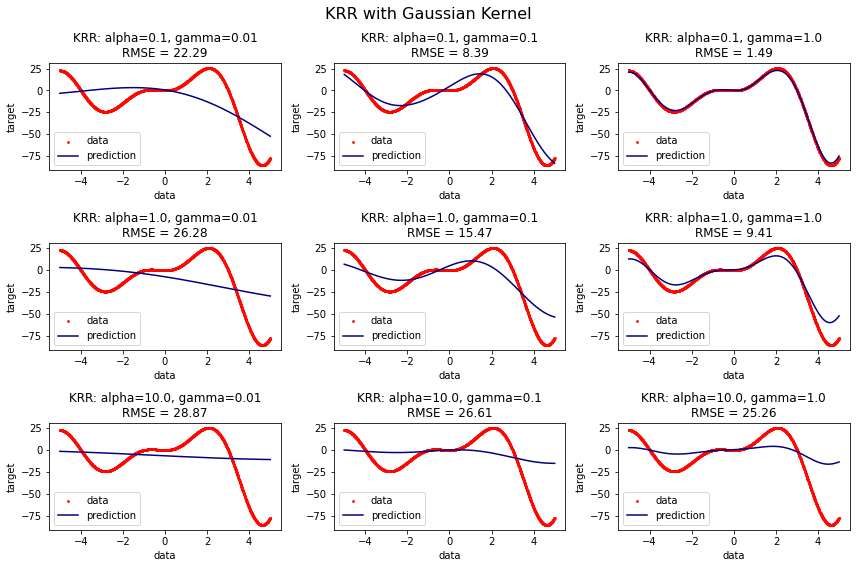

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definisce i parametri della griglia di ricerca
param_grid_Gauss = {'alpha': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0]}

# Inizializza il modello KRR
krr = KernelRidge(kernel='rbf')

# Crea un oggetto GridSearchCV
grid_search_Gauss = GridSearchCV(krr, param_grid_Gauss, cv=5, scoring='neg_root_mean_squared_error')

# Esegue la ricerca dei migliori parametri
grid_search_Gauss.fit(X_train, y_train)

# Stampa i migliori parametri e il punteggio di validazione incrociata
print("Best parameters: {}".format(grid_search_Gauss.best_params_))

# Crea una griglia per visualizzare tutti i grafici
fig, axs = plt.subplots(len(param_grid_Gauss['alpha']), len(param_grid_Gauss['gamma']), figsize=(12, 8))

# Addestra un modello per ogni combinazione di parametri della griglia
for i, alpha in enumerate(param_grid_Gauss['alpha']):
    for j, gamma in enumerate(param_grid_Gauss['gamma']):
        krr = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)
        krr.fit(X_train, y_train)
        y_pred_Gauss = krr.predict(X_test)

        # Calcola l'errore quadratico medio sul test set
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_Gauss))

        # Disegna il grafico del modello
        axs[i, j].scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
        axs[i, j].plot(X_test, y_pred_Gauss, color="navy", label="prediction")
        axs[i, j].set_xlabel("data")
        axs[i, j].set_ylabel("target")
        axs[i, j].set_title("KRR: alpha={}, gamma={}\nRMSE = {:.2f}".format(alpha, gamma, rmse))
        axs[i, j].legend()

# Disegna il grafico del test set
fig.suptitle("KRR with Gaussian Kernel", fontsize=16)
plt.tight_layout()
plt.show()


Il kernel Gaussiano per la KRR sembra dare risultati soddisfacenti anche considerando la basso sample size del training set. I migliori risultati si ottengono con iperparametri alpha e gamma di 0.1 e 1.0 rispettivamente, ottenuti con la cross validation nel training set.

Kernel polimonimale

Best parameters: {'alpha': 10.0, 'degree': 3}


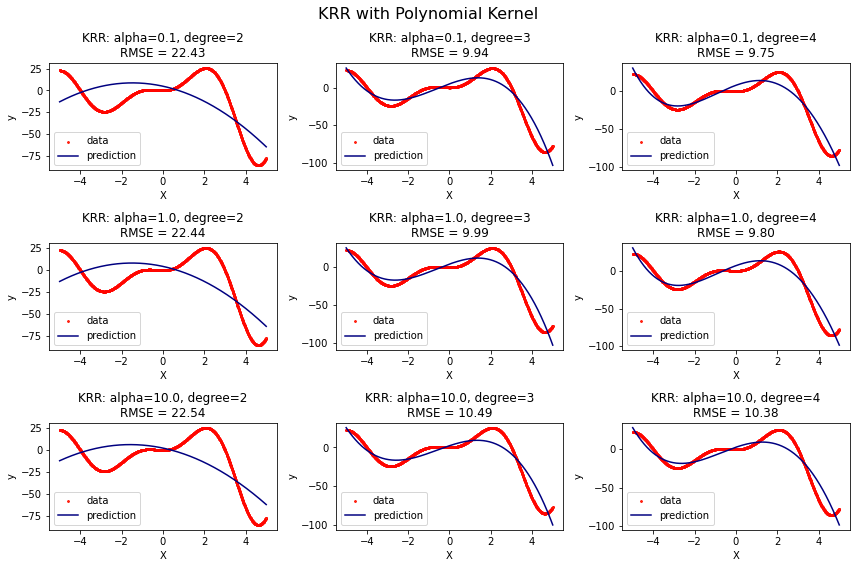

In [6]:
# Definisce i parametri della griglia di ricerca
param_grid_Poly = {'alpha': [0.1, 1.0, 10.0], 'degree': [2,3,4]}

# Inizializza il modello KRR
krr = KernelRidge(kernel='poly')

# Crea un oggetto GridSearchCV
grid_search_Poly = GridSearchCV(krr, param_grid_Poly, cv=5, scoring='neg_root_mean_squared_error')

# Esegue la ricerca dei migliori parametri
grid_search_Poly.fit(X_train, y_train)

# Stampa i migliori parametri e il punteggio di validazione incrociata
print("Best parameters: {}".format(grid_search_Poly.best_params_))

# Crea una griglia per visualizzare tutti i grafici
fig, axs = plt.subplots(len(param_grid_Poly['alpha']), len(param_grid_Poly['degree']), figsize=(12, 8))

# Addestra un modello per ogni combinazione di parametri della griglia
for i, alpha in enumerate(param_grid_Poly['alpha']):
    for j, degree in enumerate(param_grid_Poly['degree']):
        krr = KernelRidge(kernel='poly', alpha=alpha, degree=degree)
        krr.fit(X_train, y_train)
        y_pred_Poly = krr.predict(X_test)

        # Calcola l'errore quadratico medio sul test set
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_Poly))

        # Disegna il grafico del modello
        axs[i, j].scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
        axs[i, j].plot(X_test, y_pred_Poly, color="navy", label="prediction")
        axs[i, j].set_xlabel("X")
        axs[i, j].set_ylabel("y")
        axs[i, j].set_title("KRR: alpha={}, degree={}\nRMSE = {:.2f}".format(alpha, degree, rmse))
        axs[i, j].legend()

# Disegna il grafico del test set
fig.suptitle("KRR with Polynomial Kernel", fontsize=16)
plt.tight_layout()
plt.show()

Il kernel polinomiale fornisce rislutati peggiori rispetto al kernel gaussiano. 

Task:  fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

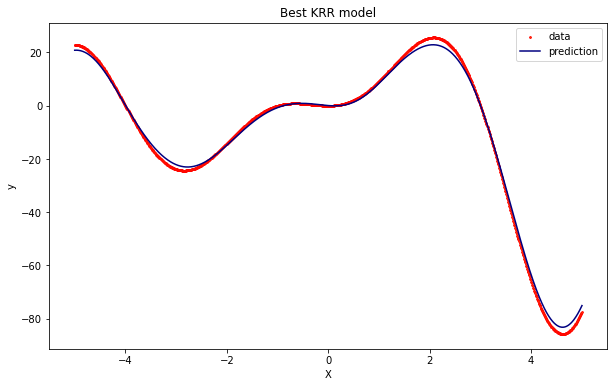

In [9]:
best_alpha = 0.1
best_gamma = 1

# create a new figure with size 10x6 inches
plt.figure(figsize=(10, 6))

krr = KernelRidge(kernel='rbf', alpha=best_alpha, gamma=best_gamma)
krr.fit(X_train, y_train)
y_pred_Gauss = krr.predict(X_test)

# Calcola l'errore quadratico medio sul test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred_Gauss))

# Disegna il grafico del modello
plt.scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
plt.plot(X_test, y_pred_Gauss, color="navy", label="prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best KRR model")
plt.legend()

Con i dati di training a disposizione un modello di KRR con kernel gaussiano e iperparamentri alpha=0.1 e gamma=1.0 danno i risultati migliori sia nel training set che nel test set. 

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

Visualizzazione del dataset:

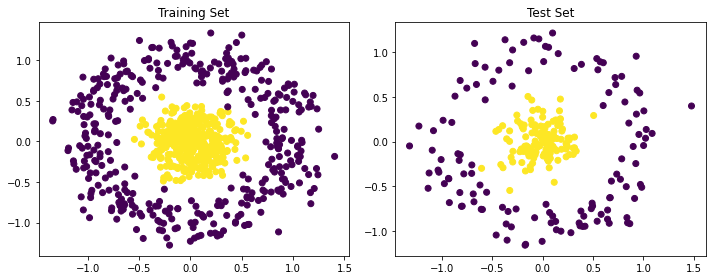

In [10]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

# Creazione dei grafici
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Grafico del training set
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
axs[0].set_title('Training Set')

# Grafico del test set
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
axs[1].set_title('Test Set')

# Visualizzazione dei grafici
plt.tight_layout()
plt.show()

### Fit a PCA model

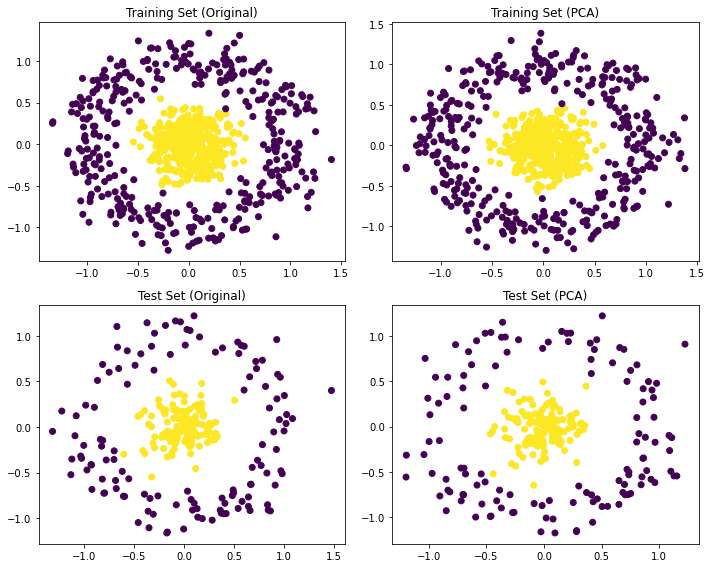

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA(n_components=2)
pca.fit(X_train)

# Transform training and test data using the PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Creazione dei grafici
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Grafico del training set prima della PCA
axs[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
axs[0, 0].set_title('Training Set (Original)')

# Grafico del training set dopo la PCA
axs[0, 1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
axs[0, 1].set_title('Training Set (PCA)')

# Grafico del test set prima della PCA
axs[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
axs[1, 0].set_title('Test Set (Original)')

# Grafico del test set dopo la PCA
axs[1, 1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
axs[1, 1].set_title('Test Set (PCA)')

# Visualizzazione dei grafici
plt.tight_layout()
plt.show()


In un dataset con solo 2 feature, la rotazione delle features non è in grado di ridurre la dimensionalità del dataset e non fornisce alcuna informazione utile. Tuttavia, la PCA su un dataset con solo 2 feature può aiutare a visualizzare i dati in un modo diverso, ad esempio, trasformando le feature in due nuove variabili, che rappresentano le direzioni di massima varianza dei dati. Questo potrebbe essere utile se si desidera esaminare come le osservazioni del dataset sono distribuite lungo queste due direzioni di varianza massima

SVM semplice sulle proiezioni:

Accuracy: 0.632


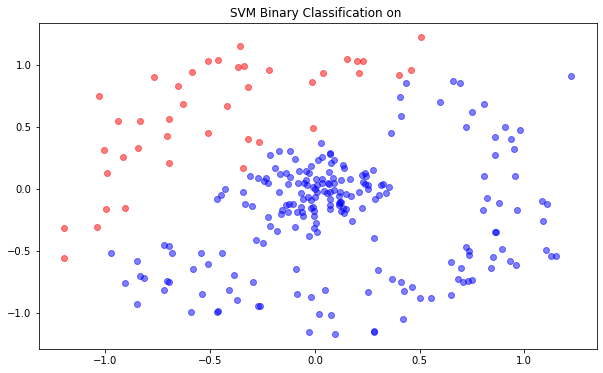

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# accuratezza dell'SVM con kernel gaussiano sui test data
svm = SVC(kernel="linear")
svm.fit(X_train_pca, y_train)
# Valutazione dell'accuratezza della SVM sui dati di test
y_pred_svm_pca = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_svm_pca)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_pca[y_pred_svm_pca==0, 0], X_test_pca[y_pred_svm_pca==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_pca[y_pred_svm_pca==1, 0], X_test_pca[y_pred_svm_pca==1, 1], color='blue', alpha=0.5)

plt.title('SVM Binary Classification on ')

plt.show()

Un modello di classificazione semplice SVM ha un'accuratezza molto bassa sui dati di test. Questo è dovuto alla natura stessa dei dati che in questo caso non sono separabili linearmente.

SVM con kernel gaussiano sulle proiezioni:

Accuracy: 0.996


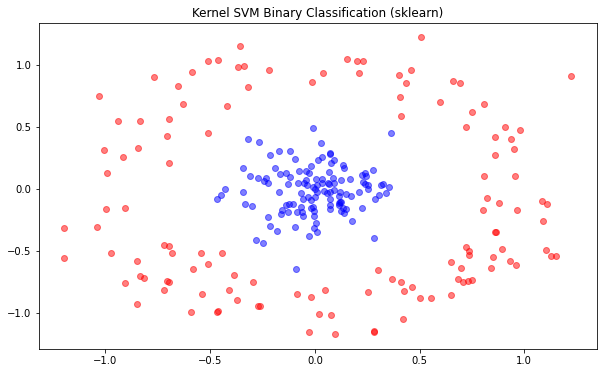

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# accuratezza dell'SVM con kernel gaussiano sui test data
svm = SVC(kernel="rbf")
svm.fit(X_train_pca, y_train)
# Valutazione dell'accuratezza della SVM sui dati di test
y_pred_svm_pca = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_svm_pca)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_pca[y_pred_svm_pca==0, 0], X_test_pca[y_pred_svm_pca==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_pca[y_pred_svm_pca==1, 0], X_test_pca[y_pred_svm_pca==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification (sklearn)')

plt.show()

Mentre utilizzando un kernel gaussiano per il KSVM si riescono ad ottenere ottimi risultati.

### Kernel PCA

Task:  Fit a Kernel PCA model with a kernel of your choice.

Miglior gamma: 10.0
Miglior accuracy: 0.988


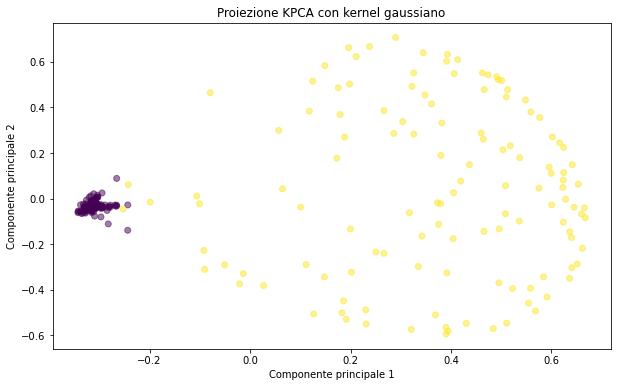

In [15]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# ricerca del miglior gamma per KPCA con kernel gaussiano
gammas = np.logspace(-2, 2, 5) # possibili gamma da provare
kpca_scores = []

for gamma in gammas:
    # KPCA con kernel gaussiano    
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    kpca.fit(X_train)
    X_train_kpca = kpca.transform(X_train)
    # SVM con kernel lineare
    svm = SVC(kernel='linear')
    svm.fit(X_train_kpca, y_train)
    X_test_kpca = kpca.transform(X_test)
    kpca_scores.append(svm.score(X_test_kpca, y_test))
# ottengo il miglior gamma    
best_gamma = gammas[np.argmax(kpca_scores)]
print("Miglior gamma:", best_gamma)
print("Miglior accuracy:", np.max(kpca_scores))

# proiezione dei dati in 2D usando KPCA con il miglior gamma
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=best_gamma)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)


plt.figure(figsize=(10, 6))
# plot della proiezione
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test, alpha=0.5)
plt.xlabel("Componente principale 1")
plt.ylabel("Componente principale 2")
plt.title("Proiezione KPCA con kernel gaussiano")
plt.show()


Accuracy: 0.988


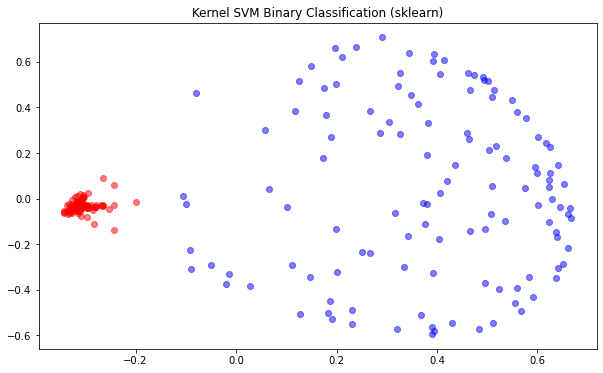

In [18]:
# Valutazione dell'accuratezza della SVM sui dati di test
svm = SVC(kernel="linear")
svm.fit(X_train_kpca, y_train)
y_pred_svm = svm.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_kpca[y_pred_svm==0, 0], X_test_kpca[y_pred_svm==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca[y_pred_svm==1, 0], X_test_kpca[y_pred_svm==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification (sklearn)')

plt.show()

Usando KPCA anzichè PCA i dati risultano facilmente separabili anche da un separatore lineare semplice come SVC con un'accuratezza soddisfacente.

## 3. PCA pt.2

Task:  Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

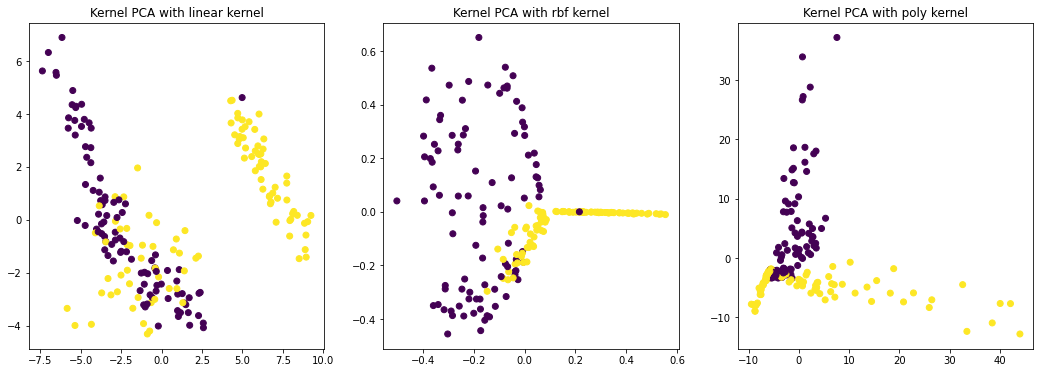

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           class_sep=2.0, shuffle=True, random_state=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Kernel PCA on 2 principal components with linear, rbf and poly kernels
kpca_linear = KernelPCA(n_components=2, kernel='linear')
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
kpca_poly = KernelPCA(n_components=2, kernel='poly')

X_train_kpca_linear = kpca_linear.fit_transform(X_train)
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_train_kpca_poly = kpca_poly.fit_transform(X_train)

X_test_kpca_linear = kpca_linear.transform(X_test)
X_test_kpca_rbf = kpca_rbf.transform(X_test)
X_test_kpca_poly = kpca_poly.transform(X_test)

# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[:, 0], X_test_kpca_linear[:, 1], c=y_test)
plt.title('Kernel PCA with linear kernel')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[:, 0], X_test_kpca_rbf[:, 1], c=y_test)
plt.title('Kernel PCA with rbf kernel')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_poly[:, 0], X_test_kpca_poly[:, 1], c=y_test)
plt.title('Kernel PCA with poly kernel')

plt.show()


Questo dataset è più complesso del precedente in quanto presenta più features, alcune delle quali ridontanti o inutili. Anche con una proiezione dei dati in 2D sembra che non sia possibile seprarli linearmente. 

SVM accuracy on KPCA (linear): 0.765
SVM accuracy on KPCA (rbf): 0.89
SVM accuracy on KPCA (poly): 0.795


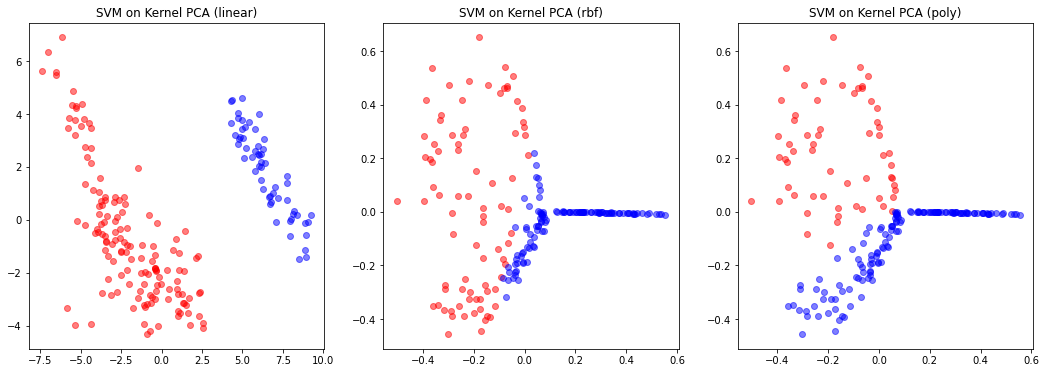

In [20]:
import numpy as np
# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_linear = SVC(kernel='linear')
svm_kpca_linear.fit(X_train_kpca_linear, y_train)
y_pred_kpca_linear = svm_kpca_linear.predict(kpca_linear.transform(X_test))
accuracy_kpca_linear = accuracy_score(y_test, y_pred_kpca_linear)
print('SVM accuracy on KPCA (linear):', accuracy_kpca_linear)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_rbf = SVC(kernel='linear')
svm_kpca_rbf.fit(X_train_kpca_rbf, y_train)
y_pred_kpca_rbf = svm_kpca_rbf.predict(X_test_kpca_rbf)
accuracy_kpca_rbf = accuracy_score(y_test, y_pred_kpca_rbf)
print('SVM accuracy on KPCA (rbf):', accuracy_kpca_rbf)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_poly = SVC(kernel='linear')
svm_kpca_poly.fit(X_train_kpca_poly, y_train)
y_pred_kpca_poly = svm_kpca_poly.predict(kpca_poly.transform(X_test))
accuracy_kpca_poly = accuracy_score(y_test, y_pred_kpca_poly)
print('SVM accuracy on KPCA (poly):', accuracy_kpca_poly)


# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==0, 0], X_test_kpca_linear[y_pred_kpca_linear==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==1, 0], X_test_kpca_linear[y_pred_kpca_linear==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (linear)')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==0, 0], X_test_kpca_rbf[y_pred_kpca_rbf==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==1, 0], X_test_kpca_rbf[y_pred_kpca_rbf==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (rbf)')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_poly==0, 0], X_test_kpca_rbf[y_pred_kpca_poly==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_poly==1, 0], X_test_kpca_rbf[y_pred_kpca_poly==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (poly)')

plt.show()


Infatti SVC semplice non fornisce grandi risultati nemmeno sulle proiezioni. Possiamo provare a migliorare i risultati utilizzando KSVC con kernel gaussiano sulle proiezioni.

KSVM accuracy on KPCA (linear): 0.84
KSVM accuracy on KPCA (rbf): 0.935
KSVM accuracy on KPCA (poly): 0.895


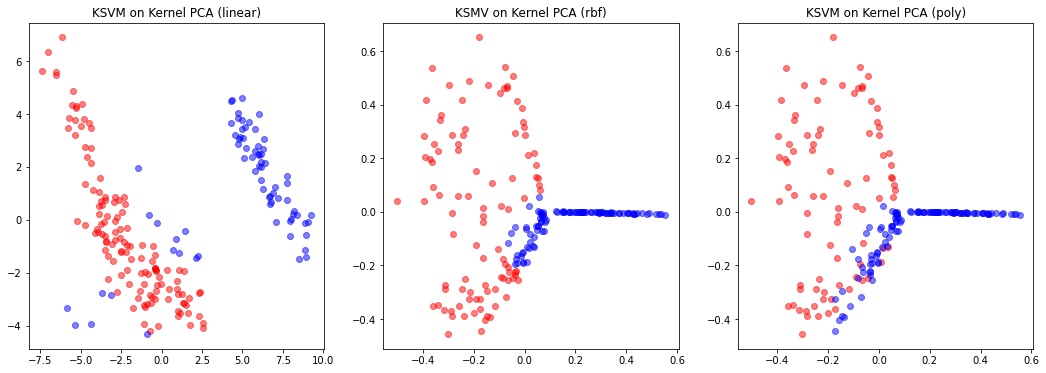

In [21]:
import numpy as np
# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_linear = SVC(kernel='rbf')
svm_kpca_linear.fit(X_train_kpca_linear, y_train)
y_pred_kpca_linear = svm_kpca_linear.predict(kpca_linear.transform(X_test))
accuracy_kpca_linear = accuracy_score(y_test, y_pred_kpca_linear)
print('KSVM accuracy on KPCA (linear):', accuracy_kpca_linear)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_rbf = SVC(kernel='rbf')
svm_kpca_rbf.fit(X_train_kpca_rbf, y_train)
y_pred_kpca_rbf = svm_kpca_rbf.predict(X_test_kpca_rbf)
accuracy_kpca_rbf = accuracy_score(y_test, y_pred_kpca_rbf)
print('KSVM accuracy on KPCA (rbf):', accuracy_kpca_rbf)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_poly = SVC(kernel='rbf')
svm_kpca_poly.fit(X_train_kpca_poly, y_train)
y_pred_kpca_poly = svm_kpca_poly.predict(kpca_poly.transform(X_test))
accuracy_kpca_poly = accuracy_score(y_test, y_pred_kpca_poly)
print('KSVM accuracy on KPCA (poly):', accuracy_kpca_poly)


# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==0, 0], X_test_kpca_linear[y_pred_kpca_linear==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==1, 0], X_test_kpca_linear[y_pred_kpca_linear==1, 1], color='blue', alpha=0.5)
plt.title('KSVM on Kernel PCA (linear)')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==0, 0], X_test_kpca_rbf[y_pred_kpca_rbf==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==1, 0], X_test_kpca_rbf[y_pred_kpca_rbf==1, 1], color='blue', alpha=0.5)
plt.title('KSMV on Kernel PCA (rbf)')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_poly==0, 0], X_test_kpca_rbf[y_pred_kpca_poly==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_poly==1, 0], X_test_kpca_rbf[y_pred_kpca_poly==1, 1], color='blue', alpha=0.5)
plt.title('KSVM on Kernel PCA (poly)')

plt.show()


Le accuratezze migliorano sensibilmente rispetto a prima e l'accuratezza migliore si riscontra nella proiezione effettuata con KPCA con kernel gaussiano.